In [192]:
import pandas as pd
import numpy as np
import glob
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_column', 50)

In [120]:
path = r'D:\gobi\cardeko\Cars'

In [121]:
df = pd.concat([pd.read_excel(file) for file in glob.glob(os.path.join(path, '*.xlsx'))], ignore_index=True)
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [122]:
df1 = pd.DataFrame(df.new_car_detail.apply(eval).tolist())
df1['Description'] = df1.trendingText.apply(lambda x: x.get('desc', None))
df1.drop('trendingText', axis=1, inplace=True)

In [123]:
df1

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,Description
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,High chances of sale in next 6 days
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,High chances of sale in next 6 days
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,High chances of sale in next 6 days
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,High chances of sale in next 6 days
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,High chances of sale in next 6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,None,High chances of sale in next 6 days
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,None,High chances of sale in next 6 days
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,None,High chances of sale in next 6 days
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,,None,High chances of sale in next 6 days


In [124]:
df['new_car_overview'] = df['new_car_overview'].apply(lambda x: {value['key']: value['value'] for value in eval(x).get('top', [])})
df2 = pd.DataFrame(df['new_car_overview'].tolist())
df2.drop('Seats', axis=1, inplace=True)
df2

,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2015,Third Party insurance,Petrol,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0
1,Feb 2018,Comprehensive,Petrol,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0
2,Sept 2018,Comprehensive,Petrol,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0
3,Dec 2014,Comprehensive,Petrol,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0
4,2015,Third Party insurance,Diesel,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0
...,...,...,...,...,...,...,...,...,...
8364,2022,Third Party insurance,Petrol,"10,000 Kms",NaN,First Owner,998 cc,Manual,2022.0
8365,2014,Third Party insurance,Petrol,"1,20,000 Kms",NaN,First Owner,796 cc,Manual,2014.0
8366,2011,Third Party insurance,Petrol,"50,000 Kms",WB06,Third Owner,1796 cc,Automatic,2011.0
8367,2012,Third Party insurance,Petrol,"40,000 Kms",NaN,First Owner,1197 cc,Manual,2012.0


In [125]:
def to_get_features(data):
    extract = {'Features': [],
               "Comfort": [],
               "Interior":[],
               "Exterior": []
               }
    
    for features in data['top']:
        extract['Features'].append(features['value'])
    try:
        for comfort in data['data'][0]['list']:
            extract['Comfort'].append(comfort['value'])
    except:
        extract['Comfort'].append('Not-Specified')


    try:
        for interior in data['data'][1]['list']:
            extract['Interior'].append(interior['value'])
    except:
        extract['Interior'].append('Not-Specified')
    
    try:
        for exterior in data['data'][2]['list']:
            extract['Exterior'].append(exterior['value'])
    except:
        extract['Exterior'].append(None)
    # print(extract)
    return extract

df.new_car_feature = df.new_car_feature.apply(lambda x: to_get_features(eval(x)))
df3 =pd.DataFrame(df.new_car_feature.tolist())
df3


,Features,Comfort,Interior,Exterior
0,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E..."
1,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
2,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
3,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
4,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow..."
...,...,...,...,...
8364,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte..."
8365,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Remote T...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E..."
8366,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Fog..."
8367,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Fog..."


In [126]:
def to_get_spec(data):
    extract = {}
    for value in data['top']:
        extract[value['key']] = value['value']

    try:
        for i in range(3):
            for value in data['data'][i]['list']:
                extract[value['key']] = value['value']
    except:
        pass

    return extract

df.new_car_specs = df.new_car_specs.apply(lambda x: to_get_spec(eval(x)))
df4 =pd.DataFrame(df.new_car_specs.tolist())
df4

,Mileage,Engine,Max Power,Torque,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,23.1 kmpl,998 CC,67.04bhp@6000rpm,90Nm,5,White,K10B Engine,998,90Nm@3500rpm,3.0,4.0,DOHC,MPFi,73 X 82 mm,11.0:1,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN
1,17 kmpl,1497 CC,121.31bhp@6500rpm,150Nm,5,White,Ti-VCT Petrol Engine,1497,150Nm@4500rpm,3.0,4.0,DOHC,Direct Injection,79 X 76.5 mm,11.0:1,No,No,3998mm,1765mm,1647mm,2519mm,NaN,NaN,1242Kg,1660Kg,5 Speed,FWD,5,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN
2,23.84 kmpl,1199 CC,84bhp@6000rpm,114Nm,5,Red,Revotron Engine,1199,114Nm@3500rpm,3.0,4.0,DOHC,MPFi,77 X 85.8 mm,10.8:1,No,No,3746mm,1647mm,1535mm,2400mm,1400mm,1420mm,1012kg,NaN,5 Speed,FWD,5,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN
3,19.1 kmpl,1197 CC,81.86bhp@6000rpm,113.75Nm,5,Others,Kappa VTVT Petrol Engine,1197,113.75Nm@4000rpm,4.0,4.0,DOHC,Direct Injection,NaN,NaN,No,No,3995mm,1660mm,1520mm,2425mm,1479mm,1493mm,1180,NaN,5 Speed,FWD,5,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN
4,23.65 kmpl,1248 CC,88.5bhp@4000rpm,200Nm,5,Gray,DDiS 200 Diesel Engine,1248,200Nm@1750rpm,4.0,4.0,DOHC,NaN,69.6 x 82 mm,NaN,Yes,No,4300mm,1785mm,1595mm,2600mm,NaN,NaN,1230Kg,1670kg,5 Speed,FWD,5,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,25.24 kmpl,998 CC,65.71bhp@5500rpm,89Nm,5,Others,K10C,998,89Nm@3500rpm,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3695mm,1655,1555,2435,1430,1440,810,1260,5-Speed,NaN,5,Electric,NaN,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",5,313,NaN,NaN,NaN
8365,22.74 kmpl,796 CC,47.3bhp@6000rpm,69Nm,5,Others,F8D Petrol Engine,796,69Nm@3500rpm,3.0,4.0,DOHC,MPFi,NaN,NaN,No,No,3395mm,1490mm,1475mm,2360mm,1295mm,1290mm,720kg,1185kg,5 Speed,FWD,5,Power,4.6 metres,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,NaN,NaN,NaN
8366,11.74 kmpl,1796 CC,186bhp@5600rpm,285Nm,5,Others,Blue Efficiency Engine,1796,285Nm@2400-4000rpm,4.0,4.0,NaN,Mpfi,NaN,9.3:1,No,No,4591mm,1770mm,1447mm,2760mm,1549mm,1552mm,1585kg,2020kg,7 Speed,RWD,5,Power,5.42 metres,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,NaN
8367,18.5 kmpl,1197 CC,85.80bhp@6000rpm,114Nm,5,Others,K Series Petrol Engine,1197,114Nm@4000rpm,4.0,4.0,DOHC,MPFI,NaN,NaN,No,No,3775mm,1680mm,1620mm,2360mm,1470mm,1480mm,1030kg,1430kg,5 Speed,FWD,5,Power,4.7 metres,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,NaN


In [127]:
clean_df =pd.concat([df1, df2, df3, df4], axis=1)
clean_df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,Description,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,...,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,High chances of sale in next 6 days,2015,Third Party insurance,Petrol,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,...,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,High chances of sale in next 6 days,Feb 2018,Comprehensive,Petrol,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,...,No,No,3998mm,1765mm,1647mm,2519mm,NaN,NaN,1242Kg,1660Kg,5 Speed,FWD,5,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,High chances of sale in next 6 days,Sept 2018,Comprehensive,Petrol,"11,949 Kms",KA03,First Owner,1199 cc,Manual,...,No,No,3746mm,1647mm,1535mm,2400mm,1400mm,1420mm,1012kg,NaN,5 Speed,FWD,5,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,High chances of sale in next 6 days,Dec 2014,Comprehensive,Petrol,"17,794 Kms",KA53,First Owner,1197 cc,Manual,...,No,No,3995mm,1660mm,1520mm,2425mm,1479mm,1493mm,1180,NaN,5 Speed,FWD,5,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,High chances of sale in next 6 days,2015,Third Party insurance,Diesel,"60,000 Kms",KA04,First Owner,1248 cc,Manual,...,Yes,No,4300mm,1785mm,1595mm,2600mm,NaN,NaN,1230Kg,1670kg,5 Speed,FWD,5,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,,None,High chances of sale in next 6 days,2022,Third Party insurance,Petrol,"10,000 Kms",NaN,First Owner,998 cc,Manual,...,NaN,NaN,3695mm,1655,1555,2435,1430,1440,810,1260,5-Speed,NaN,5,Electric,NaN,Ventilated Disc,Drum,NaN,NaN,"Tubeless, Radial",5,313,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,,None,High chances of sale in next 6 days,2014,Third Party insurance,Petrol,"1,20,000 Kms",NaN,First Owner,796 cc,Manual,...,No,No,3395mm,1490mm,1475mm,2360mm,1295mm,1290mm,720kg,1185kg,5 Speed,FWD,5,Power,4.6 metres,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,NaN,NaN,NaN
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,,None,High chances of sale in next 6 days,2011,Third Party insurance,Petrol,"50,000 Kms",WB06,Third Owner,1796 cc,Automatic,...,No,No,4591mm,1770mm,1447mm,2760mm,1549mm,1552mm,1585kg,2020kg,7 Speed,RWD,5,Power,5.42 metres,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,NaN
8367,0,Petrol,Hatchback,"40,000",Manua

In [128]:
final = clean_df.copy()
duplicate_columns = ['it', 'ft', 'km','transmission', 'owner', 'priceSaving', 'Description', 'priceFixedText', 'Ownership',
                    'Features', 'Comfort', 'Interior', 'Exterior', 'Engine','Displacement','Turbo Charger', 'Super Charger',
                    'Kerb Weight', 'Gross Weight','Drive Type', 'Seating Capacity', 'Turning Radius', 'Acceleration', 
                    'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size', 'Ground Clearance Unladen', 'Values per Cylinder', 'Value Configuration',
                    'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Length','Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',]


clean_df.drop(duplicate_columns, axis = 1, inplace = True)
clean_df.head()

,bt,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,priceActual,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Engine Displacement,Transmission,Year of Manufacture,Mileage,Max Power,Torque,Seats,Color,Engine Type,Max Torque,No of Cylinder,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Top Speed,Tyre Type,No Door Numbers
0,Hatchback,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,2015,Third Party insurance,Petrol,"1,20,000 Kms",KA51,998 cc,Manual,2015.0,23.1 kmpl,67.04bhp@6000rpm,90Nm,5,White,K10B Engine,90Nm@3500rpm,3.0,5 Speed,Power,Ventilated Disc,Drum,150 Kmph,"Tubeless, Radial",5
1,SUV,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,Feb 2018,Comprehensive,Petrol,"32,706 Kms",KA05,1497 cc,Manual,2018.0,17 kmpl,121.31bhp@6500rpm,150Nm,5,White,Ti-VCT Petrol Engine,150Nm@4500rpm,3.0,5 Speed,Power,Ventilated Disc,Drum,NaN,"Tubeless,Radial",4
2,Hatchback,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,Sept 2018,Comprehensive,Petrol,"11,949 Kms",KA03,1199 cc,Manual,2018.0,23.84 kmpl,84bhp@6000rpm,114Nm,5,Red,Revotron Engine,114Nm@3500rpm,3.0,5 Speed,Power,Disc,Drum,150 kmph,Tubeless,5
3,Sedan,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,Dec 2014,Comprehensive,Petrol,"17,794 Kms",KA53,1197 cc,Manual,2014.0,19.1 kmpl,81.86bhp@6000rpm,113.75Nm,5,Others,Kappa VTVT Petrol Engine,113.75Nm@4000rpm,4.0,5 Speed,Power,Disc,Drum,172km/hr,"Tubeless,Radial",4
4,SUV,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,2015,Third Party insurance,Diesel,"60,000 Kms",KA04,1248 cc,Manual,2015.0,23.65 kmpl,88.5bhp@4000rpm,200Nm,5,Gray,DDiS 200 Diesel Engine,200Nm@1750rpm,4.0,5 Speed,Power,Ventilated Disc,Solid Disc,190 Kmph,"Tubeless,Radial",5


In [129]:
clean_df.isna().sum()

bt                        0
ownerNo                   0
oem                       0
model                     0
modelYear                 0
centralVariantId          0
variantName               0
price                     0
priceActual               0
Registration Year        52
Insurance Validity        4
Fuel Type                 0
Kms Driven                2
RTO                     888
Engine Displacement       4
Transmission              0
Year of Manufacture      20
Mileage                 287
Max Power                60
Torque                   60
Seats                     5
Color                     3
Engine Type             295
Max Torque               60
No of Cylinder           31
Gear Box                106
Steering Type           255
Front Brake Type         96
Rear Brake Type          96
Top Speed              3762
Tyre Type                77
No Door Numbers          11
dtype: int64

In [130]:
clean_df['Registration Year'].fillna(clean_df['modelYear'], inplace=True)
clean_df['Year of Manufacture'].fillna(clean_df['modelYear'], inplace=True)

In [131]:
def fill_missing_seats(row):
    if pd.isna(row['Seats']):
        matching_row = clean_df[clean_df['model'] == row['model']].iloc[0]
        return matching_row['Seats']
    return row['Seats']

clean_df['Seats'] = clean_df.apply(fill_missing_seats, axis=1)


In [132]:
clean_df['Seats'] = clean_df['Seats'].fillna(clean_df.groupby(['oem', 'variantName'])['Seats'].transform('first'))
clean_df['Mileage'] = clean_df['Mileage'].fillna(clean_df.groupby(['oem', 'variantName'])['Mileage'].transform('first'))
clean_df['Mileage'] = clean_df['Mileage'].fillna(clean_df.groupby('oem')['Mileage'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))


In [133]:

engine_mapping = clean_df.groupby(['model', 'Engine Displacement'])['Engine Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, engine_mapping, on=['model', 'Engine Displacement'], how='left', suffixes=('', '_y'))

clean_df['Engine Type'] = clean_df['Engine Type'].fillna(clean_df['Engine Type_y'])
clean_df.drop('Engine Type_y', axis=1, inplace=True)

In [134]:
top_speed_mapping = clean_df.groupby(['model', 'variantName'])['Top Speed'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, top_speed_mapping, on=['model', 'variantName'], how='left', suffixes=('', '_y'))

clean_df['Top Speed'] = clean_df['Top Speed'].fillna(clean_df['Top Speed_y'])

clean_df.drop('Top Speed_y', axis=1, inplace=True)

In [135]:
top_speed_mapping = clean_df.groupby(['model', 'Engine Type'])['Top Speed'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, top_speed_mapping, on=['model', 'Engine Type'], how='left', suffixes=('', '_y'))

clean_df['Top Speed'] = clean_df['Top Speed'].fillna(clean_df['Top Speed_y'])

clean_df.drop('Top Speed_y', axis=1, inplace=True)

In [136]:
top_speed_mapping = clean_df.groupby(['oem', 'variantName'])['Top Speed'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, top_speed_mapping, on=['oem', 'variantName'], how='left', suffixes=('', '_y'))

clean_df['Top Speed'] = clean_df['Top Speed'].fillna(clean_df['Top Speed_y'])

clean_df.drop('Top Speed_y', axis=1, inplace=True)


In [137]:
top_speed_mapping = clean_df.groupby(['model', 'Max Power'])['Top Speed'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, top_speed_mapping, on=['model', 'Max Power'], how='left', suffixes=('', '_y'))

clean_df['Top Speed'] = clean_df['Top Speed'].fillna(clean_df['Top Speed_y'])
clean_df.drop('Top Speed_y', axis=1, inplace=True)

In [138]:
top_speed_mapping = clean_df.groupby(['model', 'Engine Displacement'])['Top Speed'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, top_speed_mapping, on=['model', 'Engine Displacement'], how='left', suffixes=('', '_y'))

clean_df['Top Speed'] = clean_df['Top Speed'].fillna(clean_df['Top Speed_y'])
clean_df.drop('Top Speed_y', axis=1, inplace=True)

In [139]:
gear_mapping = clean_df.groupby(['oem', 'Engine Type'])['Gear Box'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, gear_mapping, on=['oem', 'Engine Type'], how='left', suffixes=('', '_y'))

clean_df['Gear Box'] = clean_df['Gear Box'].fillna(clean_df['Gear Box_y'])
clean_df.drop('Gear Box_y', axis=1, inplace=True)

In [140]:
steering_mapping = clean_df.groupby(['oem', 'variantName'])['Steering Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, steering_mapping, on=['oem', 'variantName'], how='left', suffixes=('', '_y'))

clean_df['Steering Type'] = clean_df['Steering Type'].fillna(clean_df['Steering Type_y'])
clean_df.drop('Steering Type_y', axis=1, inplace=True)

In [141]:
steering_mapping = clean_df.groupby('model')['Steering Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, steering_mapping, on='model', how='left', suffixes=('', '_y'))

clean_df['Steering Type'] = clean_df['Steering Type'].fillna(clean_df['Steering Type_y'])
clean_df.drop('Steering Type_y', axis=1, inplace=True)

In [142]:
tyre_mapping = clean_df.groupby('model')['Tyre Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, tyre_mapping, on='model', how='left', suffixes=('', '_y'))
clean_df['Tyre Type'] = clean_df['Tyre Type'].fillna(clean_df['Tyre Type_y'])
clean_df.drop('Tyre Type_y', axis=1, inplace=True)

In [143]:
brake_mapping = clean_df.groupby('model')['Front Brake Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, brake_mapping, on='model', how='left', suffixes=('', '_y'))

clean_df['Front Brake Type'] = clean_df['Front Brake Type'].fillna(clean_df['Front Brake Type_y'])
clean_df.drop('Front Brake Type_y', axis=1, inplace=True)

In [144]:
brake_mapping = clean_df.groupby('model')['Rear Brake Type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

clean_df = pd.merge(clean_df, brake_mapping, on='model', how='left', suffixes=('', '_y'))

clean_df['Rear Brake Type'] = clean_df['Rear Brake Type'].fillna(clean_df['Rear Brake Type_y'])

clean_df.drop('Rear Brake Type_y', axis=1, inplace=True)

In [145]:
dataset = ['bangalore_cars.xlsx', 'chennai_cars.xlsx', 'delhi_cars.xlsx', 'hyderabad_cars.xlsx', 'jaipur_cars.xlsx', 'kolkata_cars.xlsx']
index_value = 0
data = [0]
rto_values =[]
for file in dataset:
    path = r'D:/gobi/cardeko/Cars/' + file
    dataframe = pd.read_excel(path)
    index_value += dataframe.shape[0]
    data.append(index_value)
    
for i in range(6):
    datas = clean_df.iloc[data[i]: data[i+1]]
    rto = datas.RTO.value_counts().index[0]
    rto_values.extend(rto for i in range(datas.RTO.isna().sum()))

clean_df.loc[clean_df[clean_df.RTO.isna()==True].index, 'RTO'] =rto_values

In [146]:
clean_df.isna().sum()

bt                       0
ownerNo                  0
oem                      0
model                    0
modelYear                0
centralVariantId         0
variantName              0
price                    0
priceActual              0
Registration Year        0
Insurance Validity       4
Fuel Type                0
Kms Driven               2
RTO                      0
Engine Displacement      4
Transmission             0
Year of Manufacture      0
Mileage                  0
Max Power               60
Torque                  60
Seats                    0
Color                    3
Engine Type             56
Max Torque              60
No of Cylinder          31
Gear Box                43
Steering Type           18
Front Brake Type        17
Rear Brake Type         17
Top Speed              860
Tyre Type               19
No Door Numbers         11
dtype: int64

In [147]:
# Reset index and convert to integers
clean_df = clean_df.reset_index(drop=True)

# Get list of categorical and numerical columns
categorical_columns = clean_df.select_dtypes(include='object').columns
numerical_columns = clean_df.select_dtypes(exclude='object').columns

# Fill missing values in categorical columns with mode
for col in categorical_columns:
    clean_df[col].fillna(clean_df[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with median
for col in numerical_columns:
    clean_df[col].fillna(clean_df[col].median(), inplace=True)

clean_df.isna().sum()




bt                     0
ownerNo                0
oem                    0
model                  0
modelYear              0
centralVariantId       0
variantName            0
price                  0
priceActual            0
Registration Year      0
Insurance Validity     0
Fuel Type              0
Kms Driven             0
RTO                    0
Engine Displacement    0
Transmission           0
Year of Manufacture    0
Mileage                0
Max Power              0
Torque                 0
Seats                  0
Color                  0
Engine Type            0
Max Torque             0
No of Cylinder         0
Gear Box               0
Steering Type          0
Front Brake Type       0
Rear Brake Type        0
Top Speed              0
Tyre Type              0
No Door Numbers        0
dtype: int64

In [148]:
clean_df

,bt,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,priceActual,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Engine Displacement,Transmission,Year of Manufacture,Mileage,Max Power,Torque,Seats,Color,Engine Type,Max Torque,No of Cylinder,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Top Speed,Tyre Type,No Door Numbers
0,Hatchback,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,2015,Third Party insurance,Petrol,"1,20,000 Kms",KA51,998 cc,Manual,2015.0,23.1 kmpl,67.04bhp@6000rpm,90Nm,5,White,K10B Engine,90Nm@3500rpm,3.0,5 Speed,Power,Ventilated Disc,Drum,150 Kmph,"Tubeless, Radial",5
1,SUV,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,Feb 2018,Comprehensive,Petrol,"32,706 Kms",KA05,1497 cc,Manual,2018.0,17 kmpl,121.31bhp@6500rpm,150Nm,5,White,Ti-VCT Petrol Engine,150Nm@4500rpm,3.0,5 Speed,Power,Ventilated Disc,Drum,182 Kmph,"Tubeless,Radial",4
2,Hatchback,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,Sept 2018,Comprehensive,Petrol,"11,949 Kms",KA03,1199 cc,Manual,2018.0,23.84 kmpl,84bhp@6000rpm,114Nm,5,Red,Revotron Engine,114Nm@3500rpm,3.0,5 Speed,Power,Disc,Drum,150 kmph,Tubeless,5
3,Sedan,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,Dec 2014,Comprehensive,Petrol,"17,794 Kms",KA53,1197 cc,Manual,2014.0,19.1 kmpl,81.86bhp@6000rpm,113.75Nm,5,Others,Kappa VTVT Petrol Engine,113.75Nm@4000rpm,4.0,5 Speed,Power,Disc,Drum,172km/hr,"Tubeless,Radial",4
4,SUV,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,2015,Third Party insurance,Diesel,"60,000 Kms",KA04,1248 cc,Manual,2015.0,23.65 kmpl,88.5bhp@4000rpm,200Nm,5,Gray,DDiS 200 Diesel Engine,200Nm@1750rpm,4.0,5 Speed,Power,Ventilated Disc,Solid Disc,190 Kmph,"Tubeless,Radial",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,2022,Third Party insurance,Petrol,"10,000 Kms",WB02,998 cc,Manual,2022.0,25.24 kmpl,65.71bhp@5500rpm,89Nm,5,Others,K10C,89Nm@3500rpm,3.0,5-Speed,Electric,Ventilated Disc,Drum,150 Kmph,"Tubeless, Radial",5
8365,Hatchback,1,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,2014,Third Party insurance,Petrol,"1,20,000 Kms",WB02,796 cc,Manual,2014.0,22.74 kmpl,47.3bhp@6000rpm,69Nm,5,Others,F8D Petrol Engine,69Nm@3500rpm,3.0,5 Speed,Power,Solid Disc,Drum,140 kmph,Tubeless Tyres,5
8366,Sedan,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,2011,Third Party insurance,Petrol,"50,000 Kms",WB06,1796 cc,Automatic,2011.0,11.74 kmpl,186bhp@5600rpm,285Nm,5,Others,Blue Efficiency Engine,285Nm@2400-4000rpm,4.0,7 Speed,Power,Ventilated Disc,Solid Disc,230km/hr,"Tubeless,Radial",4
8367,Hatchback,1,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,2012,Third Party insurance,Petrol,"40,000 Kms",WB02,1197 cc,Manual,2012.0,18.5 kmpl,85.80bhp@6000rpm,114Nm,5,Others,K Series Petrol Engine,114Nm@4000rpm,4.0,5 Speed,Power,Ventilated Disc,Drum,156 Kmph,"Tubeless,Radial",5


In [149]:
clean_df.rename(columns={'bt':'BT','ownerNo':'Number_of_Owners','oem':'Car Name','model':'Car Model','modelYear':'Model Year','centralVariantId':'Central VariantId','variantName':'Variant Name','price':'Price',
                         'priceActual':'Actual Price','Kms Driven':'Kms Driven(kms)','Engine Displacement':'Engine Displacement(cc)','Mileage':'Mileage(kmpl)',
                         'Torque':'Torque(Nm)','Gear Box':'Gear Box(speed)','Top Speed':'Top Speed(kmph)'},inplace=True)

In [150]:
clean_df

,BT,Number_of_Owners,Car Name,Car Model,Model Year,Central VariantId,Variant Name,Price,Actual Price,Registration Year,Insurance Validity,Fuel Type,Kms Driven(kms),RTO,Engine Displacement(cc),Transmission,Year of Manufacture,Mileage(kmpl),Max Power,Torque(Nm),Seats,Color,Engine Type,Max Torque,No of Cylinder,Gear Box(speed),Steering Type,Front Brake Type,Rear Brake Type,Top Speed(kmph),Tyre Type,No Door Numbers
0,Hatchback,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,2015,Third Party insurance,Petrol,"1,20,000 Kms",KA51,998 cc,Manual,2015.0,23.1 kmpl,67.04bhp@6000rpm,90Nm,5,White,K10B Engine,90Nm@3500rpm,3.0,5 Speed,Power,Ventilated Disc,Drum,150 Kmph,"Tubeless, Radial",5
1,SUV,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,Feb 2018,Comprehensive,Petrol,"32,706 Kms",KA05,1497 cc,Manual,2018.0,17 kmpl,121.31bhp@6500rpm,150Nm,5,White,Ti-VCT Petrol Engine,150Nm@4500rpm,3.0,5 Speed,Power,Ventilated Disc,Drum,182 Kmph,"Tubeless,Radial",4
2,Hatchback,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,Sept 2018,Comprehensive,Petrol,"11,949 Kms",KA03,1199 cc,Manual,2018.0,23.84 kmpl,84bhp@6000rpm,114Nm,5,Red,Revotron Engine,114Nm@3500rpm,3.0,5 Speed,Power,Disc,Drum,150 kmph,Tubeless,5
3,Sedan,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,Dec 2014,Comprehensive,Petrol,"17,794 Kms",KA53,1197 cc,Manual,2014.0,19.1 kmpl,81.86bhp@6000rpm,113.75Nm,5,Others,Kappa VTVT Petrol Engine,113.75Nm@4000rpm,4.0,5 Speed,Power,Disc,Drum,172km/hr,"Tubeless,Radial",4
4,SUV,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,2015,Third Party insurance,Diesel,"60,000 Kms",KA04,1248 cc,Manual,2015.0,23.65 kmpl,88.5bhp@4000rpm,200Nm,5,Gray,DDiS 200 Diesel Engine,200Nm@1750rpm,4.0,5 Speed,Power,Ventilated Disc,Solid Disc,190 Kmph,"Tubeless,Radial",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,₹ 5.10 Lakh,,2022,Third Party insurance,Petrol,"10,000 Kms",WB02,998 cc,Manual,2022.0,25.24 kmpl,65.71bhp@5500rpm,89Nm,5,Others,K10C,89Nm@3500rpm,3.0,5-Speed,Electric,Ventilated Disc,Drum,150 Kmph,"Tubeless, Radial",5
8365,Hatchback,1,Maruti,Maruti Alto 800,2014,3943,LXI,₹ 1.80 Lakh,,2014,Third Party insurance,Petrol,"1,20,000 Kms",WB02,796 cc,Manual,2014.0,22.74 kmpl,47.3bhp@6000rpm,69Nm,5,Others,F8D Petrol Engine,69Nm@3500rpm,3.0,5 Speed,Power,Solid Disc,Drum,140 kmph,Tubeless Tyres,5
8366,Sedan,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,₹ 5.50 Lakh,,2011,Third Party insurance,Petrol,"50,000 Kms",WB06,1796 cc,Automatic,2011.0,11.74 kmpl,186bhp@5600rpm,285Nm,5,Others,Blue Efficiency Engine,285Nm@2400-4000rpm,4.0,7 Speed,Power,Ventilated Disc,Solid Disc,230km/hr,"Tubeless,Radial",4
8367,Hatchback,1,Maruti,Maruti Ritz,2012,4144,ZXi,₹ 1.40 Lakh,,2012,Third Party insurance,Petrol,"40,000 Kms",WB02,1197 cc,Manual,2012.0,18.5 kmpl,85.80bhp@6000rpm,114Nm,5,Others,K Series Petrol Engine,114Nm@4000rpm,4.0,5 Speed,Power,Ventilated Disc,Drum,156 Kmph,"Tubeless,Radial",5


In [151]:
def convert_currency_to_numeric(currency):
    if 'Crore' in currency:
        return float(currency.replace('₹', '').replace('Crore', '').replace('Lakh', '').strip()) * 10000000
    elif 'Lakh' in currency:
        return float(currency.replace('₹', '').replace('Lakh', '').strip()) * 100000
    elif '' in currency:
        return float
    else:
        return float(currency.replace('₹', '').strip())
clean_df['Price'] = clean_df['Price'].apply(convert_currency_to_numeric)

In [152]:
clean_df['Registration Year'] = clean_df['Registration Year'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nanth\AppData\Local\Temp\ipykernel_12772\2776733037.py:1: SyntaxWarning: invalid escape sequence '\d'
  clean_df['Registration Year'] = clean_df['Registration Year'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)


In [153]:
clean_df['Registration Year'].unique()

array([2015., 2018., 2014., 2020., 2017., 2021., 2019., 2022., 2016.,
       2011., 2009., 2013., 2010., 2008., 2006., 2012., 2005., 2007.,
       2023.,   nan, 2004., 2003., 2002.])

In [154]:
clean_df['Kms Driven(kms)'] = clean_df['Kms Driven(kms)'].str.replace('[^\d]', '', regex=True).astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nanth\AppData\Local\Temp\ipykernel_12772\923856245.py:1: SyntaxWarning: invalid escape sequence '\d'
  clean_df['Kms Driven(kms)'] = clean_df['Kms Driven(kms)'].str.replace('[^\d]', '', regex=True).astype(int)


In [155]:
clean_df['Kms Driven(kms)'].unique()

array([120000,  32706,  11949, ...,  53562,  32190, 151000])

In [156]:
clean_df['Engine Displacement(cc)'] = pd.to_numeric(clean_df['Engine Displacement(cc)'].str.extract('(\d+)')[0])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nanth\AppData\Local\Temp\ipykernel_12772\2840193914.py:1: SyntaxWarning: invalid escape sequence '\d'
  clean_df['Engine Displacement(cc)'] = pd.to_numeric(clean_df['Engine Displacement(cc)'].str.extract('(\d+)')[0])


In [157]:
clean_df['Engine Displacement(cc)'].unique()

array([ 998, 1497, 1199, 1197, 1248, 1956, 1198, 1462, 2179, 1950, 1396,
       1995, 1498, 4663, 1086, 1991, 1968, 1998, 2982, 1461, 1797,  796,
       1353, 2925, 2987, 2967,  999, 1341, 1496, 1582, 1798, 1120, 1969,
       1451,  814, 1999, 1591, 1397, 1368, 1598, 3198, 1196, 2993, 2755,
       2143, 2354, 1332, 2199, 1997, 1499, 2148, 2696, 1364, 2494, 1373,
       1299, 1061, 1493, 2497, 1495, 1590, 1896, 1330, 1781, 1390, 1194,
       2953, 1399, 1595, 2496,    0, 1984, 2694, 1298, 2362,  970, 2198,
       1599,  993, 2393, 1389, 1597, 2498, 2523, 1586,  995, 2499, 2998,
         72, 1589,  624, 1596,  799, 3597, 2184, 1405, 5000, 1422, 1047,
       2200, 2996, 1108, 2400, 1996, 1395, 1186, 1799, 2999, 1482,  793,
        936, 4134, 1796, 1172, 1468, 1193, 2477, 2997, 2995, 2487, 1794,
       3456, 2360, 3982, 2894, 3346, 3498, 2979, 1349, 2157, 1985, 2112,
       2446, 2359, 2609, 2956, 2231, 2835, 1150, 1343, 2981, 4395, 1817,
       3993, 1948, 4806, 2994, 1993, 1490, 2489], d

In [158]:
clean_df['Engine Displacement(cc)'].replace(0, np.nan, inplace=True)
clean_df.dropna(subset=['Engine Displacement(cc)'], inplace=True)

In [159]:
clean_df['Engine Displacement(cc)'].unique()

array([ 998., 1497., 1199., 1197., 1248., 1956., 1198., 1462., 2179.,
       1950., 1396., 1995., 1498., 4663., 1086., 1991., 1968., 1998.,
       2982., 1461., 1797.,  796., 1353., 2925., 2987., 2967.,  999.,
       1341., 1496., 1582., 1798., 1120., 1969., 1451.,  814., 1999.,
       1591., 1397., 1368., 1598., 3198., 1196., 2993., 2755., 2143.,
       2354., 1332., 2199., 1997., 1499., 2148., 2696., 1364., 2494.,
       1373., 1299., 1061., 1493., 2497., 1495., 1590., 1896., 1330.,
       1781., 1390., 1194., 2953., 1399., 1595., 2496., 1984., 2694.,
       1298., 2362.,  970., 2198., 1599.,  993., 2393., 1389., 1597.,
       2498., 2523., 1586.,  995., 2499., 2998.,   72., 1589.,  624.,
       1596.,  799., 3597., 2184., 1405., 5000., 1422., 1047., 2200.,
       2996., 1108., 2400., 1996., 1395., 1186., 1799., 2999., 1482.,
        793.,  936., 4134., 1796., 1172., 1468., 1193., 2477., 2997.,
       2995., 2487., 1794., 3456., 2360., 3982., 2894., 3346., 3498.,
       2979., 1349.,

In [160]:
clean_df['Mileage(kmpl)'] = clean_df['Mileage(kmpl)'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nanth\AppData\Local\Temp\ipykernel_12772\3396106122.py:1: SyntaxWarning: invalid escape sequence '\d'
  clean_df['Mileage(kmpl)'] = clean_df['Mileage(kmpl)'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)


In [161]:
clean_df['Torque(Nm)'] = clean_df['Torque(Nm)'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nanth\AppData\Local\Temp\ipykernel_12772\2926229113.py:1: SyntaxWarning: invalid escape sequence '\d'
  clean_df['Torque(Nm)'] = clean_df['Torque(Nm)'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)


In [162]:
clean_df['Gear Box(speed)'] = clean_df['Gear Box(speed)'].str.replace('Speed','-Speed', ' ').astype(float)

In [163]:
clean_df['Top Speed(kmph)'] = clean_df['Top Speed(kmph)'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nanth\AppData\Local\Temp\ipykernel_12772\3325154563.py:1: SyntaxWarning: invalid escape sequence '\d'
  clean_df['Top Speed(kmph)'] = clean_df['Top Speed(kmph)'].str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)


In [164]:
clean_df

,BT,Number_of_Owners,Car Name,Car Model,Model Year,Central VariantId,Variant Name,Price,Actual Price,Registration Year,Insurance Validity,Fuel Type,Kms Driven(kms),RTO,Engine Displacement(cc),Transmission,Year of Manufacture,Mileage(kmpl),Max Power,Torque(Nm),Seats,Color,Engine Type,Max Torque,No of Cylinder,Gear Box(speed),Steering Type,Front Brake Type,Rear Brake Type,Top Speed(kmph),Tyre Type,No Door Numbers
0,Hatchback,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,,2015.0,Third Party insurance,Petrol,120000,KA51,998.0,Manual,2015.0,23.10,67.04bhp@6000rpm,90.00,5,White,K10B Engine,90Nm@3500rpm,3.0,NaN,Power,Ventilated Disc,Drum,150.0,"Tubeless, Radial",5
1,SUV,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,,2018.0,Comprehensive,Petrol,32706,KA05,1497.0,Manual,2018.0,17.00,121.31bhp@6500rpm,150.00,5,White,Ti-VCT Petrol Engine,150Nm@4500rpm,3.0,NaN,Power,Ventilated Disc,Drum,182.0,"Tubeless,Radial",4
2,Hatchback,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,,2018.0,Comprehensive,Petrol,11949,KA03,1199.0,Manual,2018.0,23.84,84bhp@6000rpm,114.00,5,Red,Revotron Engine,114Nm@3500rpm,3.0,NaN,Power,Disc,Drum,150.0,Tubeless,5
3,Sedan,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,,2014.0,Comprehensive,Petrol,17794,KA53,1197.0,Manual,2014.0,19.10,81.86bhp@6000rpm,113.75,5,Others,Kappa VTVT Petrol Engine,113.75Nm@4000rpm,4.0,NaN,Power,Disc,Drum,172.0,"Tubeless,Radial",4
4,SUV,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,,2015.0,Third Party insurance,Diesel,60000,KA04,1248.0,Manual,2015.0,23.65,88.5bhp@4000rpm,200.00,5,Gray,DDiS 200 Diesel Engine,200Nm@1750rpm,4.0,NaN,Power,Ventilated Disc,Solid Disc,190.0,"Tubeless,Radial",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,1,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,510000.0,,2022.0,Third Party insurance,Petrol,10000,WB02,998.0,Manual,2022.0,25.24,65.71bhp@5500rpm,89.00,5,Others,K10C,89Nm@3500rpm,3.0,NaN,Electric,Ventilated Disc,Drum,150.0,"Tubeless, Radial",5
8365,Hatchback,1,Maruti,Maruti Alto 800,2014,3943,LXI,180000.0,,2014.0,Third Party insurance,Petrol,120000,WB02,796.0,Manual,2014.0,22.74,47.3bhp@6000rpm,69.00,5,Others,F8D Petrol Engine,69Nm@3500rpm,3.0,NaN,Power,Solid Disc,Drum,140.0,Tubeless Tyres,5
8366,Sedan,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,550000.0,,2011.0,Third Party insurance,Petrol,50000,WB06,1796.0,Automatic,2011.0,11.74,186bhp@5600rpm,285.00,5,Others,Blue Efficiency Engine,285Nm@2400-4000rpm,4.0,NaN,Power,Ventilated Disc,Solid Disc,230.0,"Tubeless,Radial",4
8367,Hatchback,1,Maruti,Maruti Ritz,2012,4144,ZXi,140000.0,,2012.0,Third Party insurance,Petrol,40000,WB02,1197.0,Manual,2012.0,18.50,85.80bhp@6000rpm,114.00,5,Others,K Series Petrol Engine,114Nm@4000rpm,4.0,NaN,Power,Ventilated Disc,Drum,156.0,"Tubeless,Radial",5


In [165]:
clean_df.isna().sum()

BT                            0
Number_of_Owners              0
Car Name                      0
Car Model                     0
Model Year                    0
Central VariantId             0
Variant Name                  0
Price                         0
Actual Price                  0
Registration Year            51
Insurance Validity            0
Fuel Type                     0
Kms Driven(kms)               0
RTO                           0
Engine Displacement(cc)       0
Transmission                  0
Year of Manufacture           0
Mileage(kmpl)                 0
Max Power                     0
Torque(Nm)                    0
Seats                         0
Color                         0
Engine Type                   0
Max Torque                    0
No of Cylinder                0
Gear Box(speed)            8343
Steering Type                 0
Front Brake Type              0
Rear Brake Type               0
Top Speed(kmph)              90
Tyre Type                     0
No Door 

In [166]:
nan_rows = clean_df[clean_df['Gear Box(speed)'].isna()]
print(nan_rows[['Gear Box(speed)']])

      Gear Box(speed)
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
...               ...
8364              NaN
8365              NaN
8366              NaN
8367              NaN
8368              NaN

[8343 rows x 1 columns]


In [167]:
clean_df.dropna(subset=['Top Speed(kmph)'], inplace=True)
clean_df.dropna(subset=['Registration Year'],inplace=True)

In [168]:
clean_df.isna().sum()

BT                            0
Number_of_Owners              0
Car Name                      0
Car Model                     0
Model Year                    0
Central VariantId             0
Variant Name                  0
Price                         0
Actual Price                  0
Registration Year             0
Insurance Validity            0
Fuel Type                     0
Kms Driven(kms)               0
RTO                           0
Engine Displacement(cc)       0
Transmission                  0
Year of Manufacture           0
Mileage(kmpl)                 0
Max Power                     0
Torque(Nm)                    0
Seats                         0
Color                         0
Engine Type                   0
Max Torque                    0
No of Cylinder                0
Gear Box(speed)            8203
Steering Type                 0
Front Brake Type              0
Rear Brake Type               0
Top Speed(kmph)               0
Tyre Type                     0
No Door 

In [169]:
columns_to_drop = ['BT','Number_of_Owners','Central VariantId','Variant Name','Actual Price','Insurance Validity','RTO','Max Power','Torque(Nm)','Seats','Color','Engine Type','Max Torque','No of Cylinder','Gear Box(speed)','Front Brake Type','Rear Brake Type','Tyre Type','No Door Numbers']

for column in columns_to_drop:
    clean_df.drop(columns=column, inplace=True)

In [170]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8203 entries, 0 to 8368
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Name                 8203 non-null   object 
 1   Car Model                8203 non-null   object 
 2   Model Year               8203 non-null   int64  
 3   Price                    8203 non-null   object 
 4   Registration Year        8203 non-null   float64
 5   Fuel Type                8203 non-null   object 
 6   Kms Driven(kms)          8203 non-null   int32  
 7   Engine Displacement(cc)  8203 non-null   float64
 8   Transmission             8203 non-null   object 
 9   Year of Manufacture      8203 non-null   float64
 10  Mileage(kmpl)            8203 non-null   float64
 11  Steering Type            8203 non-null   object 
 12  Top Speed(kmph)          8203 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 865.2+ KB


In [171]:
clean_df['Price'] = pd.to_numeric(clean_df['Price'], errors='coerce')
clean_df['Model Year'] = pd.to_numeric(clean_df['Model Year'], errors='coerce')
clean_df['Kms Driven(kms)'] = pd.to_numeric(clean_df['Kms Driven(kms)'], errors='coerce')


In [172]:
clean_df['Price'] = clean_df['Price'].astype(float)
clean_df['Model Year'] = clean_df['Model Year'].astype(float)
clean_df['Kms Driven(kms)'] = clean_df['Kms Driven(kms)'].astype(float)

In [176]:
clean_df

,Car Name,Car Model,Model Year,Price,Registration Year,Fuel Type,Kms Driven(kms),Engine Displacement(cc),Transmission,Year of Manufacture,Mileage(kmpl),Steering Type,Top Speed(kmph)
0,Maruti,Maruti Celerio,2015.0,400000.0,2015.0,Petrol,120000.0,998.0,Manual,2015.0,23.10,Power,150.0
1,Ford,Ford Ecosport,2018.0,811000.0,2018.0,Petrol,32706.0,1497.0,Manual,2018.0,17.00,Power,182.0
2,Tata,Tata Tiago,2018.0,585000.0,2018.0,Petrol,11949.0,1199.0,Manual,2018.0,23.84,Power,150.0
3,Hyundai,Hyundai Xcent,2014.0,462000.0,2014.0,Petrol,17794.0,1197.0,Manual,2014.0,19.10,Power,172.0
4,Maruti,Maruti SX4 S Cross,2015.0,790000.0,2015.0,Diesel,60000.0,1248.0,Manual,2015.0,23.65,Power,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Maruti,Maruti Celerio,2022.0,510000.0,2022.0,Petrol,10000.0,998.0,Manual,2022.0,25.24,Electric,150.0
8365,Maruti,Maruti Alto 800,2014.0,180000.0,2014.0,Petrol,120000.0,796.0,Manual,2014.0,22.74,Power,140.0
8366,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,550000.0,2011.0,Petrol,50000.0,1796.0,Automatic,2011.0,11.74,Power,230.0
8367,Maruti,Maruti Ritz,2012.0,140000.0,2012.0,Petrol,40000.0,1197.0,Manual,2012.0,18.50,Power,156.0


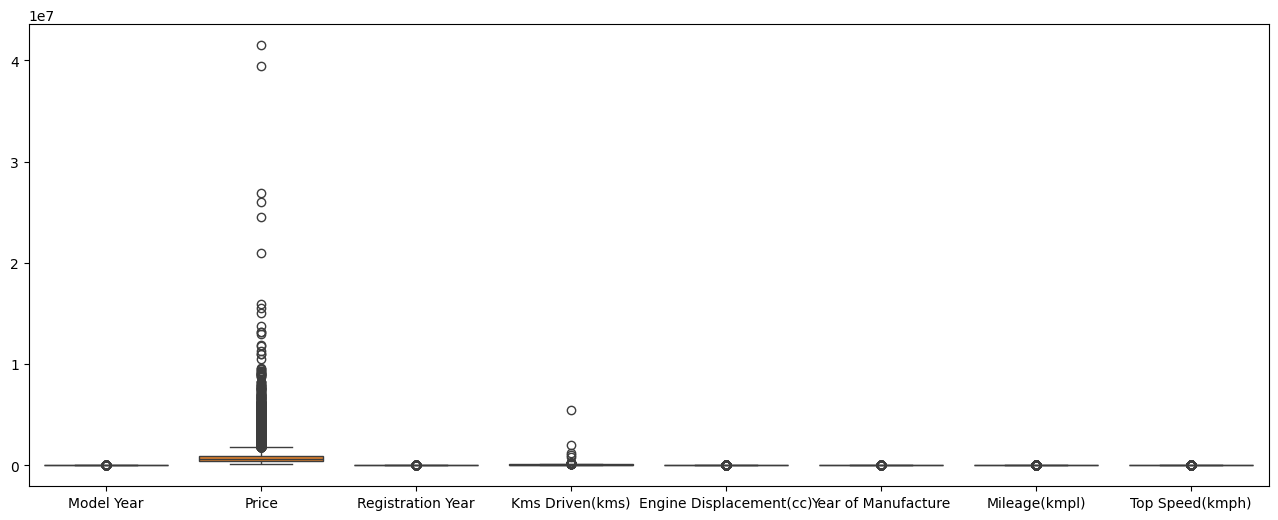

In [178]:
plt.figure(figsize=(16,6))
sns.boxplot(data=clean_df)
plt.show()

Model Year


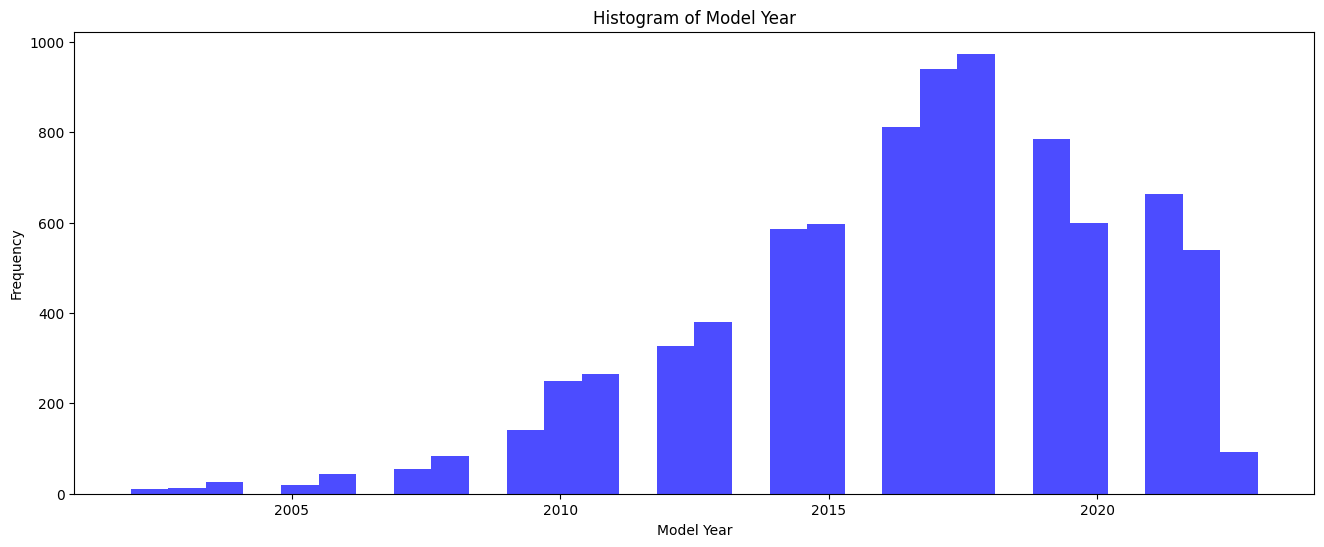

Price


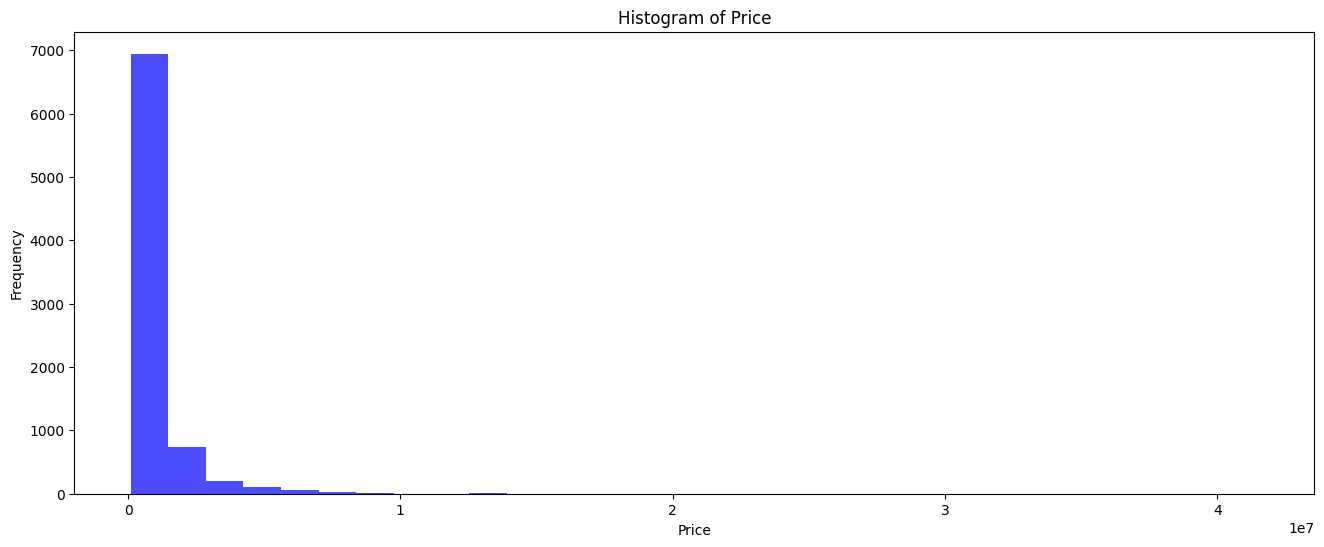

Registration Year


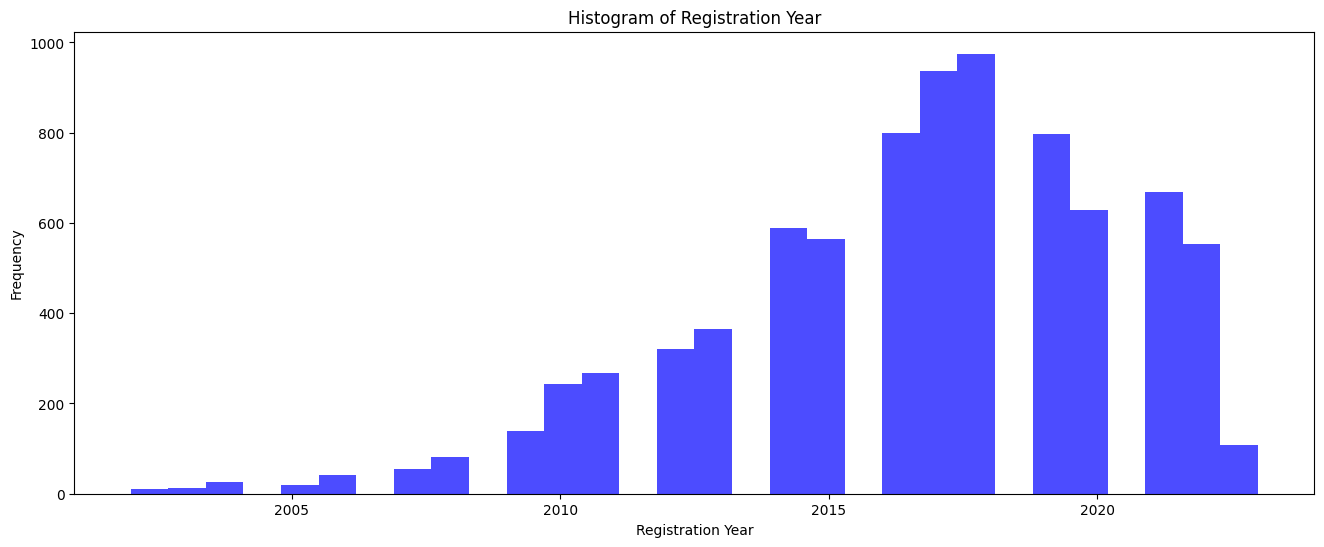

Kms Driven(kms)


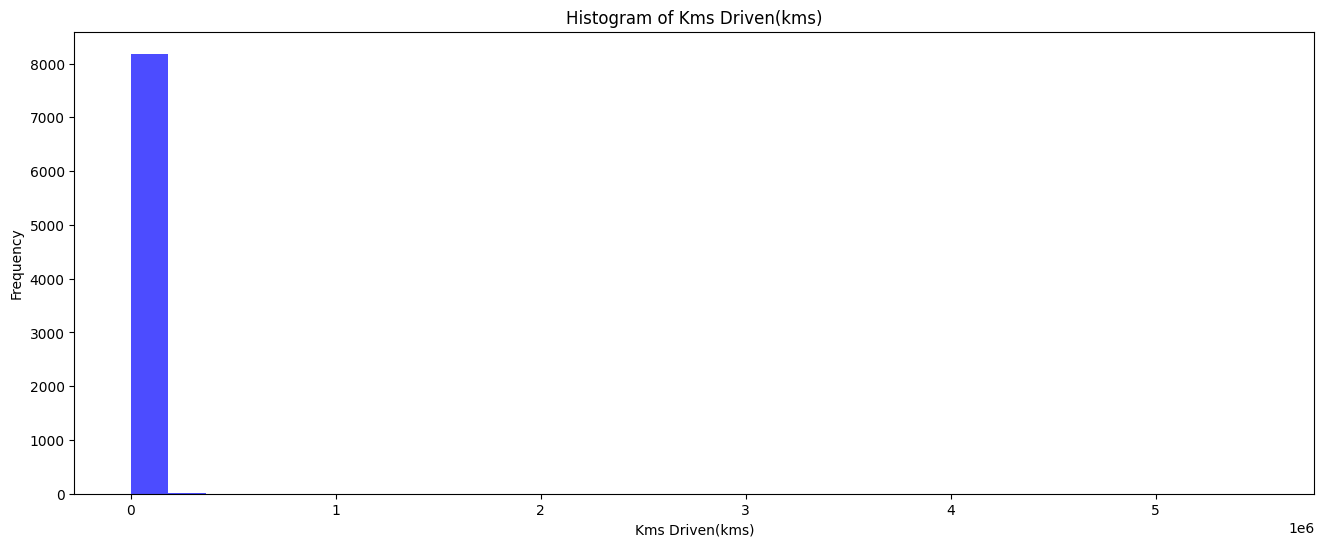

Engine Displacement(cc)


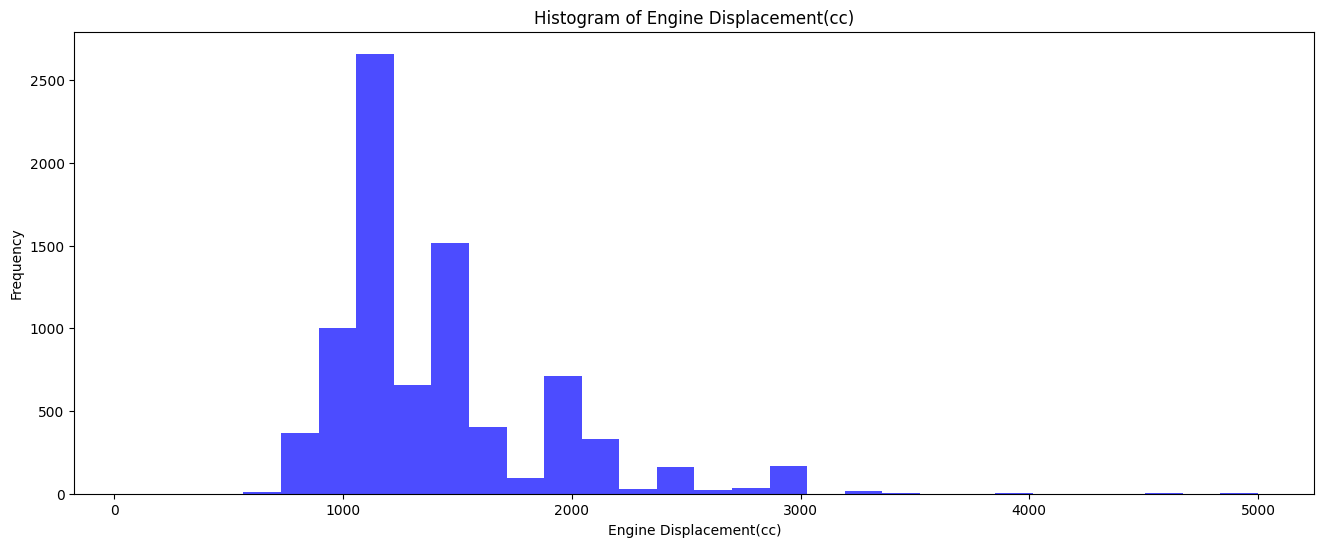

Year of Manufacture


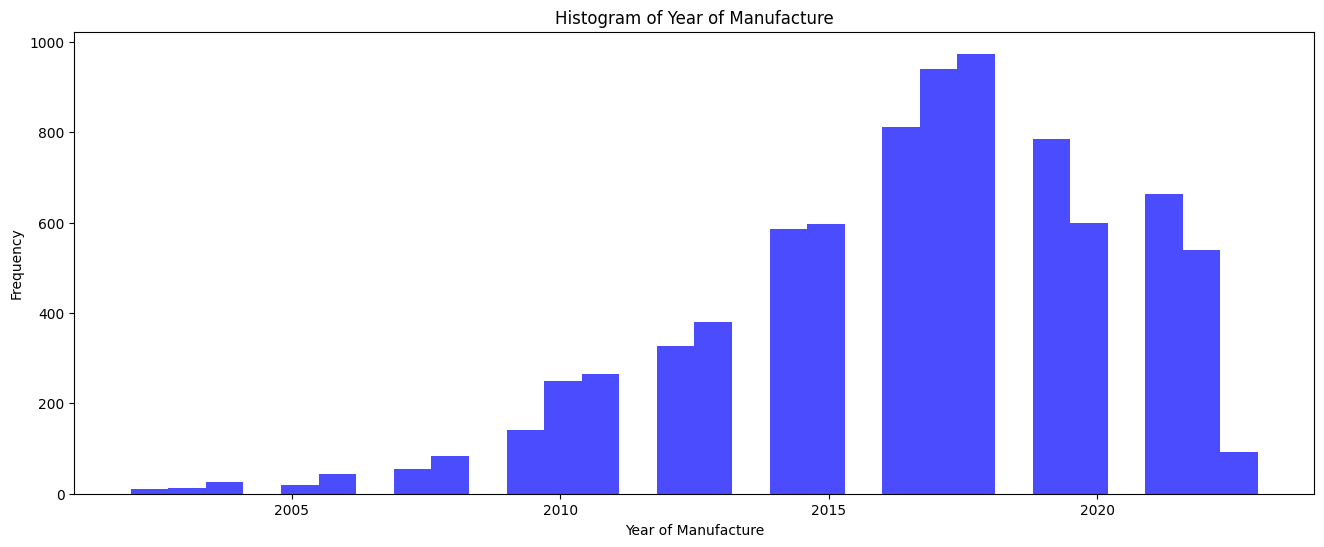

Mileage(kmpl)


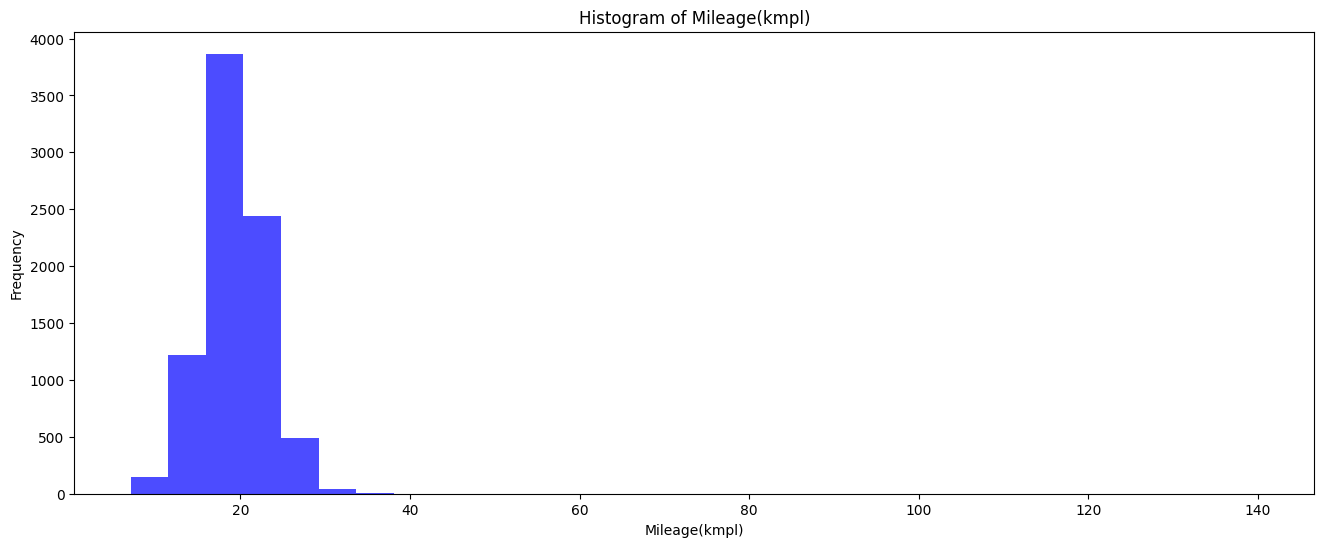

Top Speed(kmph)


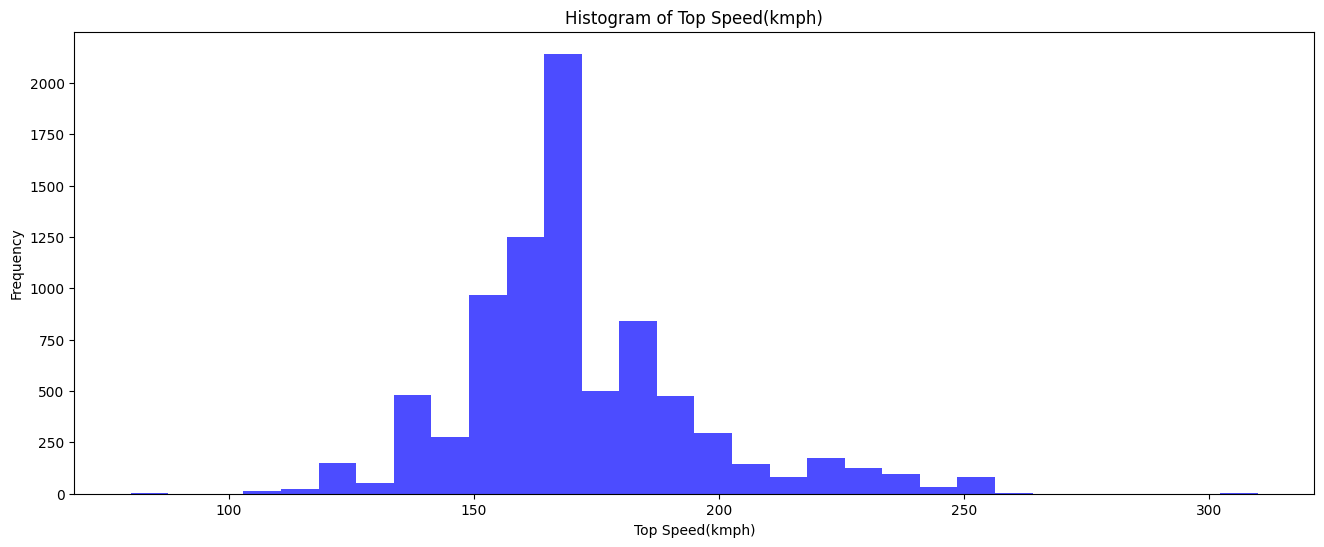

In [180]:
for i in clean_df.columns:
    if clean_df[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16, 6))
        plt.hist(clean_df[i], bins=30, color='blue', alpha=0.7)
        plt.title(f'Histogram of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()


Model Year


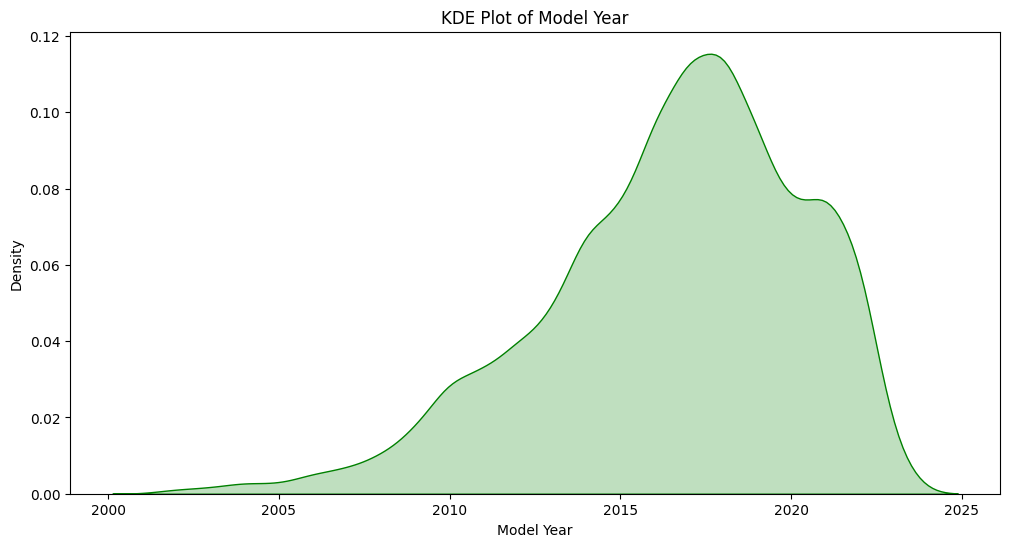

Price


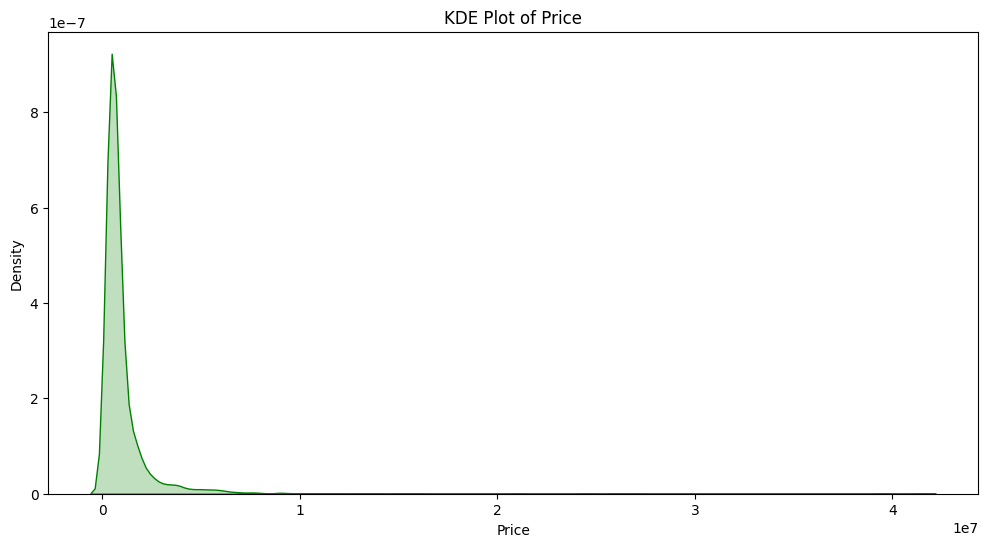

Registration Year


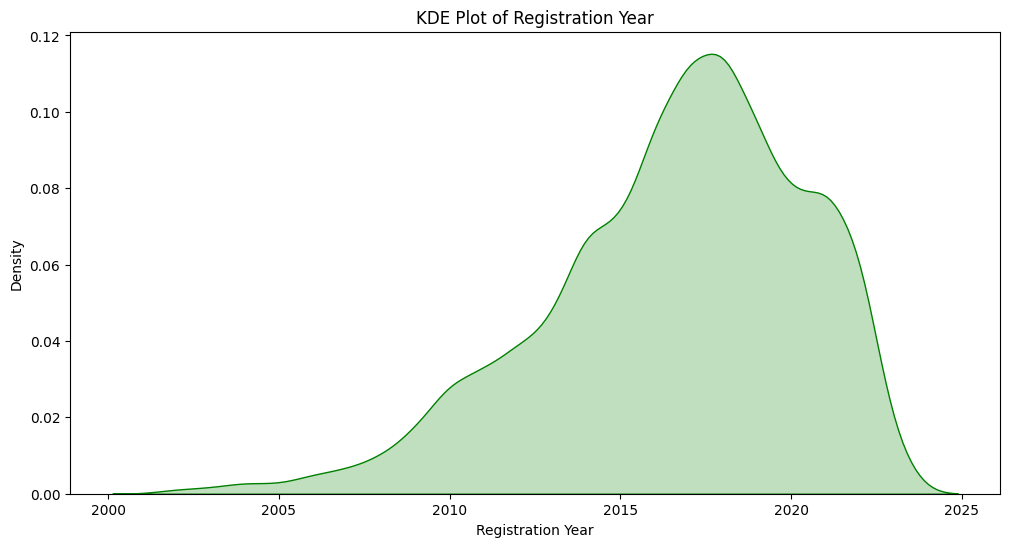

Kms Driven(kms)


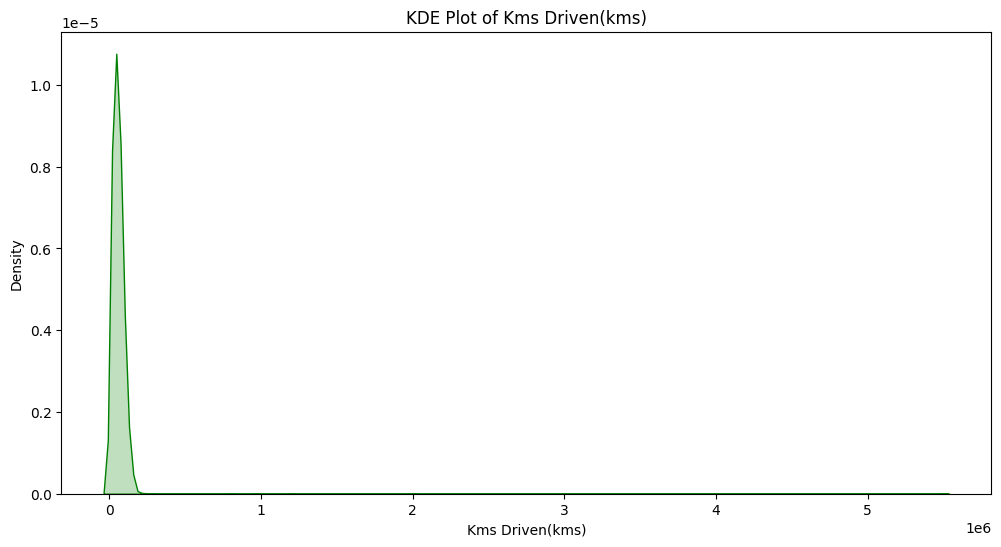

Engine Displacement(cc)


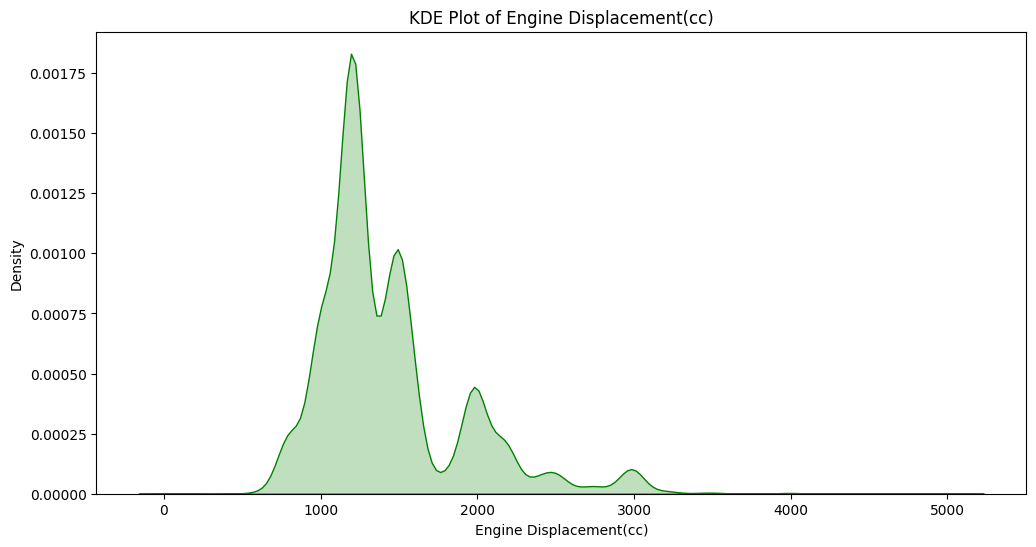

Year of Manufacture


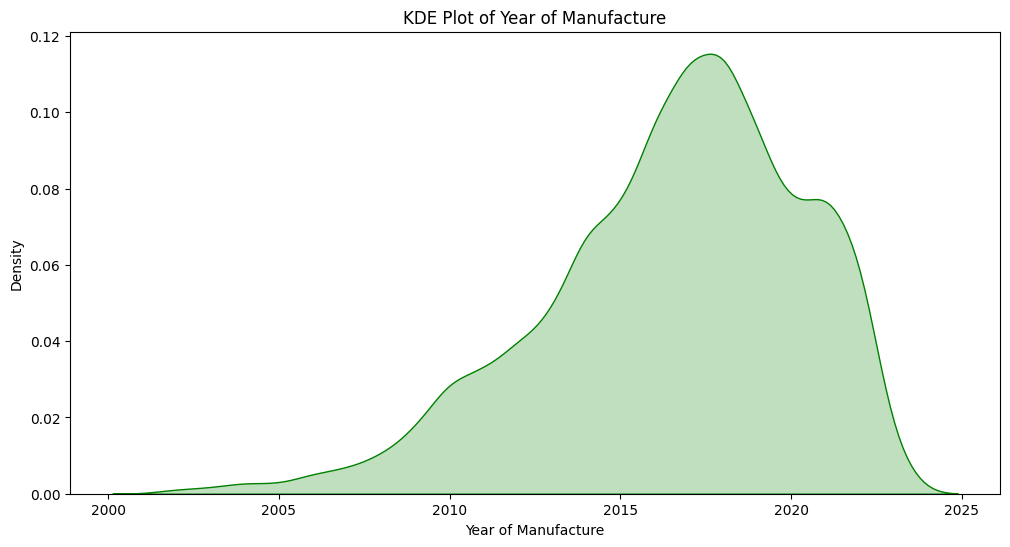

Mileage(kmpl)


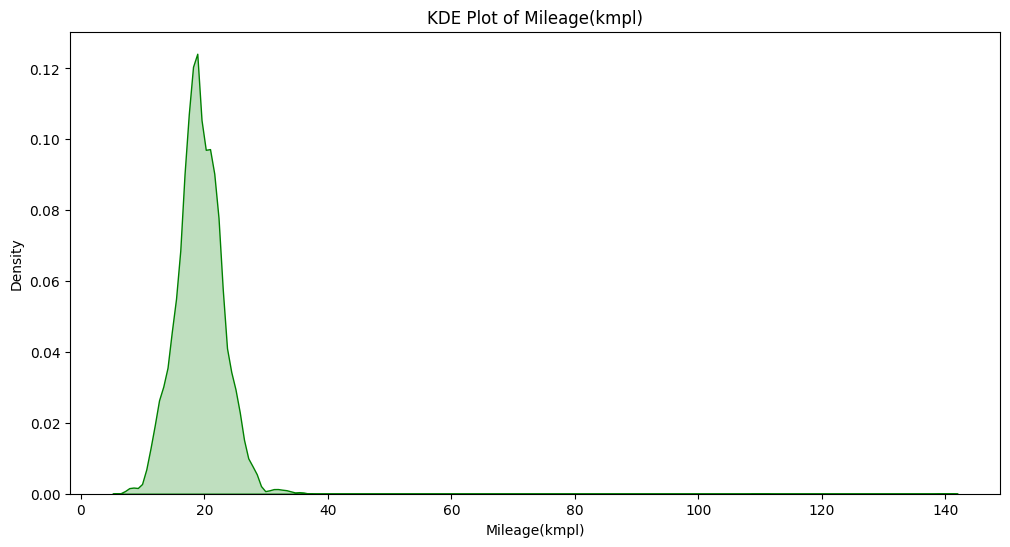

Top Speed(kmph)


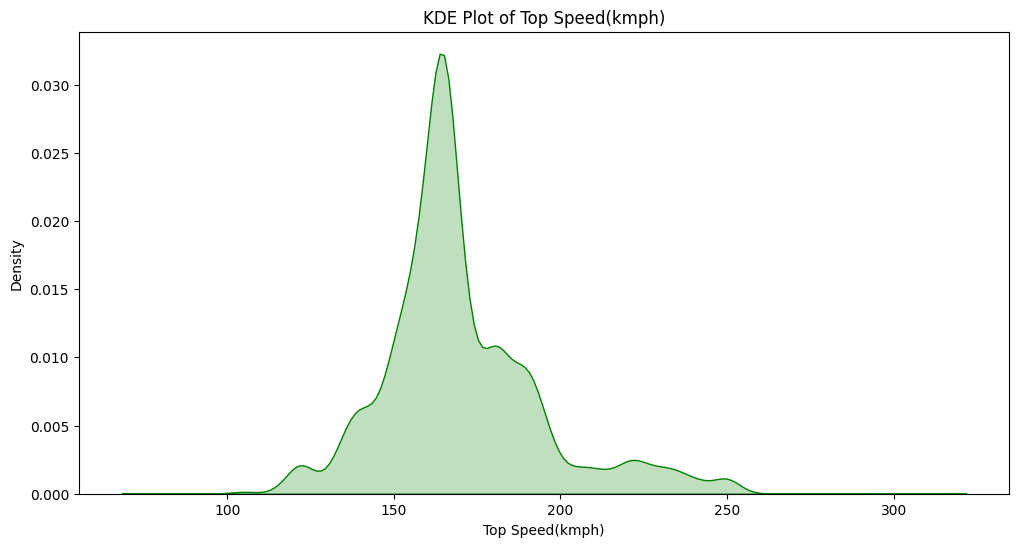

In [181]:
for i in clean_df.columns:
    if clean_df[i].dtype != 'object':
        print(i)

        # KDE Plot
        plt.figure(figsize=(12, 6))
        sns.kdeplot(data=clean_df[i], fill=True, color="green")
        plt.title(f'KDE Plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Density')
        plt.show()

In [183]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in clean_df.columns:
    if clean_df[i].dtype == 'object':
        col_name = i
        clean_df[i] = enc.fit_transform(clean_df[[i]])
        encode = clean_df[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(clean_df[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

In [185]:
clean_df.to_csv('Modeling_Car_Dheko.csv', index = False)

In [186]:
df = pd.read_csv('Modeling_Car_Dheko.csv')
df

,Car Name,Car Model,Model Year,Price,Registration Year,Fuel Type,Kms Driven(kms),Engine Displacement(cc),Transmission,Year of Manufacture,Mileage(kmpl),Steering Type,Top Speed(kmph)
0,20.0,153.0,2015.0,400000.0,2015.0,4.0,120000.0,998.0,1.0,2015.0,23.10,5.0,150.0
1,6.0,50.0,2018.0,811000.0,2018.0,4.0,32706.0,1497.0,1.0,2018.0,17.00,5.0,182.0
2,29.0,261.0,2018.0,585000.0,2018.0,4.0,11949.0,1199.0,1.0,2018.0,23.84,5.0,150.0
3,9.0,85.0,2014.0,462000.0,2014.0,4.0,17794.0,1197.0,1.0,2014.0,19.10,5.0,172.0
4,20.0,171.0,2015.0,790000.0,2015.0,1.0,60000.0,1248.0,1.0,2015.0,23.65,5.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8198,20.0,153.0,2022.0,510000.0,2022.0,4.0,10000.0,998.0,1.0,2022.0,25.24,1.0,150.0
8199,20.0,148.0,2014.0,180000.0,2014.0,4.0,120000.0,796.0,1.0,2014.0,22.74,5.0,140.0
8200,21.0,190.0,2011.0,550000.0,2011.0,4.0,50000.0,1796.0,0.0,2011.0,11.74,5.0,230.0
8201,20.0,168.0,2012.0,140000.0,2012.0,4.0,40000.0,1197.0,1.0,2012.0,18.50,5.0,156.0


In [223]:
df['Engine Displacement(cc)'].max()

5000.0

In [188]:
cont = df[['Model Year','Price','Registration Year','Kms Driven(kms)','Engine Displacement(cc)','Year of Manufacture','Mileage(kmpl)','Top Speed(kmph)']]
cat = df[['Car Name','Car Model','Fuel Type','Transmission','Steering Type']]

<Axes: >

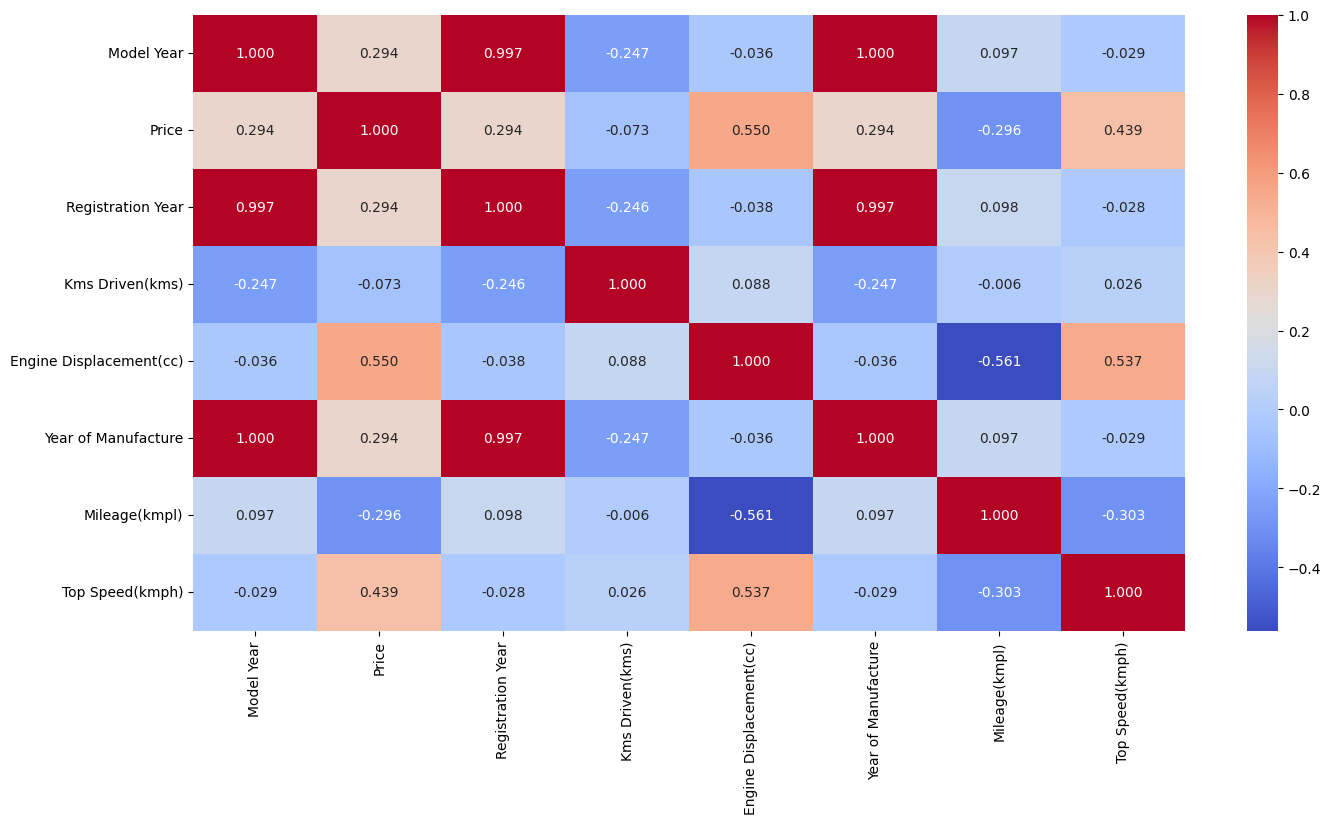

In [189]:
plt.figure(figsize=(16,8))
sns.heatmap(cont.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [190]:
df.drop(df[['Registration Year','Model Year']], axis = 1, inplace = True)

In [191]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

for i in cat:
    for j in cat:
        if i != j:
            cramer_v = cramers_v(df[i], df[j])
            print(f"Cramér's V for {i} and {j}: {cramer_v}")


Cramér's V for Car Name and Car Model: 0.9833995441338647
Cramér's V for Car Name and Fuel Type: 0.23415352825828
Cramér's V for Car Name and Transmission: 0.5332942822240274
Cramér's V for Car Name and Steering Type: 0.3057321850483754
Cramér's V for Car Model and Car Name: 0.9833995441338647
Cramér's V for Car Model and Fuel Type: 0.6045842236117592
Cramér's V for Car Model and Transmission: 0.5981879964984269
Cramér's V for Car Model and Steering Type: 0.7136460030969103
Cramér's V for Fuel Type and Car Name: 0.23415352825828
Cramér's V for Fuel Type and Car Model: 0.6045842236117592
Cramér's V for Fuel Type and Transmission: 0.11650768339197065
Cramér's V for Fuel Type and Steering Type: 0.12111072551798714
Cramér's V for Transmission and Car Name: 0.5332942822240274
Cramér's V for Transmission and Car Model: 0.5981879964984269
Cramér's V for Transmission and Fuel Type: 0.11650768339197065
Cramér's V for Transmission and Steering Type: 0.08437938780573484
Cramér's V for Steering Ty

In [199]:

df.dropna(subset=['Price'], inplace=True)
features = df.drop('Price', axis=1)
target = df['Price']


In [195]:
features = df.drop('Price',axis = 1)
target = df['Price']

In [200]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [201]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
4,Engine Displacement(cc),48.108952
6,Year of Manufacture,16.166333
3,Kms Driven(kms),13.780782
9,Top Speed(kmph),10.279614
7,Mileage(kmpl),5.204667
1,Car Model,2.638602
5,Transmission,2.120358
0,Car Name,0.873738
2,Fuel Type,0.424218
8,Steering Type,0.402735


In [202]:
selected_features = feature_importance.head(5)['column'].values
X_selected = features[selected_features]

In [206]:
x = X_selected
y = df['Price']

In [208]:
x

,Engine Displacement(cc),Year of Manufacture,Kms Driven(kms),Top Speed(kmph),Mileage(kmpl)
0,998.0,2015.0,120000.0,150.0,23.10
1,1497.0,2018.0,32706.0,182.0,17.00
2,1199.0,2018.0,11949.0,150.0,23.84
3,1197.0,2014.0,17794.0,172.0,19.10
4,1248.0,2015.0,60000.0,190.0,23.65
...,...,...,...,...,...
8198,998.0,2022.0,10000.0,150.0,25.24
8199,796.0,2014.0,120000.0,140.0,22.74
8200,1796.0,2011.0,50000.0,230.0,11.74
8201,1197.0,2012.0,40000.0,156.0,18.50


In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [209]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6482, 5), (1621, 5), (6482,), (1621,))

In [210]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [211]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

167116.51207050003
190712.7534334197
0.7977673751773133
0.8226808787530657


In [215]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [216]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

151473.3621875032
164906.01526171027
0.833022981611077
0.8900034157018599


In [217]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [218]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

72168.69539287232
157031.62047250985
0.9940156434598554
0.8824209334815355


In [219]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [220]:
import pickle

with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(model_RF,file)